## Big Data Mart Sales

Introducion

Problem Statement:

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products.

Breakdown of the Problem Statement:

Supervised machine learning problem.
The target value will be Item_Outlet_Sales.

Aim of the NoteBook:
The objective is to create a model that can predict the sales per product for each store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

#### Importing Liberaries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

#### Data

In [2]:
df1 = pd.read_csv("E:/Study/bgmart_train.csv")
df2 = pd.read_csv("E:/Study/bgmart_test.csv")

In [3]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Unnamed: 12'],
      dtype='object')

In [4]:
df2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [5]:
df1.shape, df2.shape

((8523, 13), (5681, 13))

In [6]:
df = pd.concat([df1,df2],sort = False)
print(df1.shape,df2.shape,df.shape)

(8523, 13) (5681, 13) (14204, 14)


In [7]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Unnamed: 12,Unnamed: 11
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,NaN,NaN
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,NaN,NaN
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,NaN,NaN
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,NaN,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,NaN,NaN
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,NaN,NaN
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,NaN,NaN
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,NaN,NaN


### EDA

In [8]:
df.shape

(14204, 14)

In [9]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Unnamed: 12', 'Unnamed: 11'],
      dtype='object')

In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Unnamed: 12,Unnamed: 11
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000,0.0,0.0
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914,NaN,NaN
std,4.652502,0.051459,62.086938,8.371664,1706.499616,NaN,NaN
min,4.555000,0.000000,31.290000,1985.000000,33.290000,NaN,NaN
25%,8.710000,0.027036,94.012000,1987.000000,834.247400,NaN,NaN
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000,NaN,NaN
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400,NaN,NaN
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,NaN,NaN


In [12]:
df.isnull().sum()

Item_Identifier                  0
Item_Weight                   2439
Item_Fat_Content                 0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Outlet_Identifier                0
Outlet_Establishment_Year        0
Outlet_Size                   4016
Outlet_Location_Type             0
Outlet_Type                      0
Item_Outlet_Sales             5681
Unnamed: 12                  14204
Unnamed: 11                  14204
dtype: int64

In [13]:
df.drop(columns =['Unnamed: 12','Unnamed: 11'],axis=1,inplace=True)

### Ploting the Graph

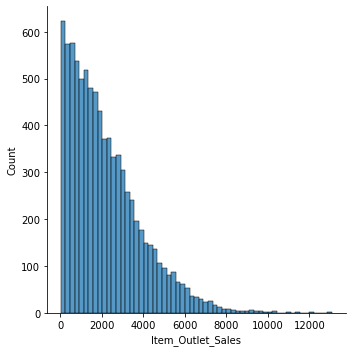

In [14]:
sns.displot(df["Item_Outlet_Sales"])

In [15]:
print('Skewness: %f' % df['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %df['Item_Outlet_Sales'].kurt())

Skewness: 1.177531
Kurtsis: 1.615877


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [17]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Categorizing and Transforming the data

In [18]:
categorial_features = df.select_dtypes(include=[np.object])
categorial_features.head()

<ipython-input-18-eb70cb702c32>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorial_features = df.select_dtypes(include=[np.object])


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [19]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [20]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [21]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [22]:
df = df.astype('category')
df.dtypes

Item_Identifier              category
Item_Weight                  category
Item_Fat_Content             category
Item_Visibility              category
Item_Type                    category
Item_MRP                     category
Outlet_Identifier            category
Outlet_Establishment_Year    category
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales            category
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,1,1097,4,7567,9,4,1,0,1,2540
1,8,57,2,1436,14,632,3,8,1,2,2,422
2,662,375,1,1172,10,3897,9,4,1,0,1,1639
3,1121,392,2,0,6,5626,0,3,3,2,0,670
4,1297,265,1,0,9,848,1,1,0,2,1,865


In [25]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Item_Weight           14204 non-null  int64
 1   Item_Fat_Content      14204 non-null  int32
 2   Item_Visibility       14204 non-null  int64
 3   Item_MRP              14204 non-null  int64
 4   Outlet_Size           14204 non-null  int32
 5   Outlet_Location_Type  14204 non-null  int32
 6   Item_Outlet_Sales     14204 non-null  int64
dtypes: int32(3), int64(4)
memory usage: 979.3 KB


### Correlation

In [26]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.025842,-0.096220,-0.045484,-0.012048,0.012340,-0.001089,-0.003173,0.002786,-0.002473,-0.004532,0.003767
Item_Weight,0.025842,1.000000,-0.021645,0.019043,0.031675,0.021899,-0.002368,-0.277920,-0.078549,0.038802,0.182948,-0.003554
Item_Fat_Content,-0.096220,-0.021645,1.000000,0.038220,-0.121140,-0.006551,-0.001733,-0.002541,-0.004608,-0.002518,-0.002380,0.003605
Item_Visibility,-0.045484,0.019043,0.038220,1.000000,-0.045290,0.000989,-0.078271,-0.063153,0.066939,-0.009642,-0.118253,-0.052196
Item_Type,-0.012048,0.031675,-0.121140,-0.045290,1.000000,0.048657,0.001126,0.003295,-0.001554,0.002083,0.004305,0.009857
Item_MRP,0.012340,0.021899,-0.006551,0.000989,0.048657,1.000000,-0.000754,0.000203,-0.000764,0.000994,0.000064,0.264443
Outlet_Identifier,-0.001089,-0.002368,-0.001733,-0.078271,0.001126,-0.000754,1.000000,-0.030948,0.053157,-0.716151,0.099899,0.092133
Outlet_Establishment_Year,-0.003173,-0.277920,-0.002541,-0.063153,0.003295,0.000203,-0.030948,1.000000,0.360744,0.041889,-0.040255,0.011100
Outlet_Size,0.002786,-0.078549,-0.004608,0.066939,-0.001554,-0.000764,0.053157,0.360744,1.000000,-0.290188,-0.432092,-0.087404
Outlet_Location_Type,-0.002473,0.038802,-0.002518,-0.009642,0.002083,0.000994,-0.716151,0.041889,-0.290188,1.000000,0.467251,0.034298


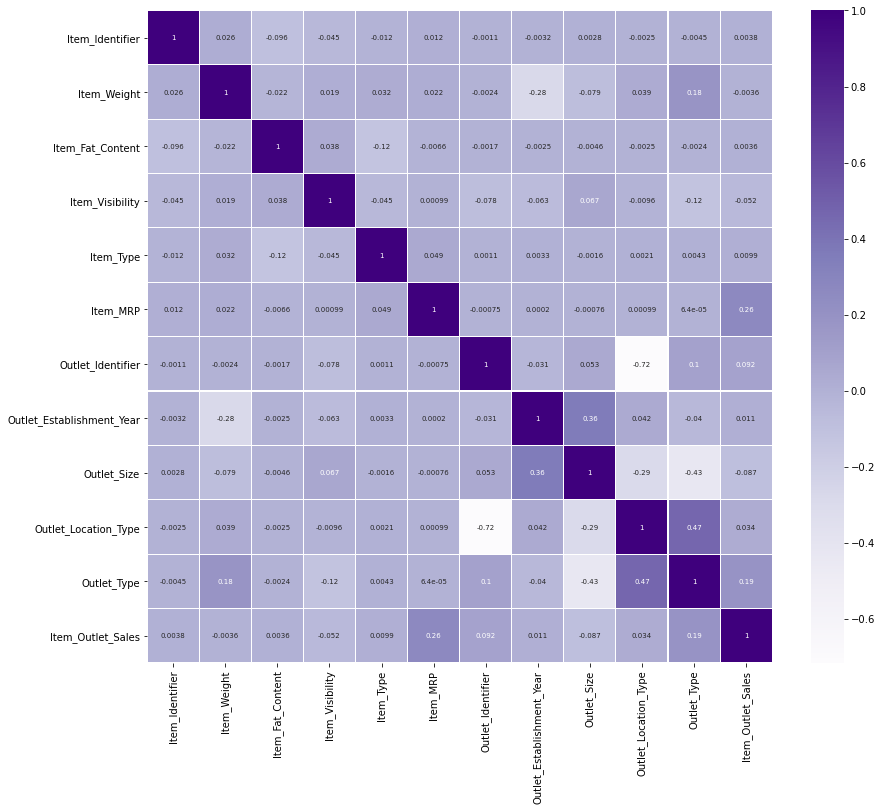

In [27]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
plt.show()

We can see Item_Outlet_Sales is highly correlated with Item_MRP

In [28]:
df.Outlet_Size.value_counts()

1    4655
3    4016
2    3980
0    1553
Name: Outlet_Size, dtype: int64

Text(0.5, 1.0, 'Item_Weight Boxplot')

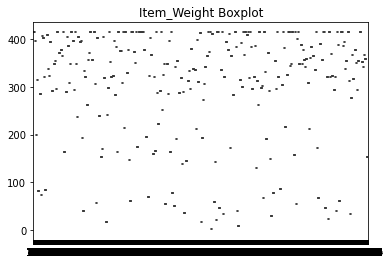

In [29]:
sns.boxplot(data=df['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")

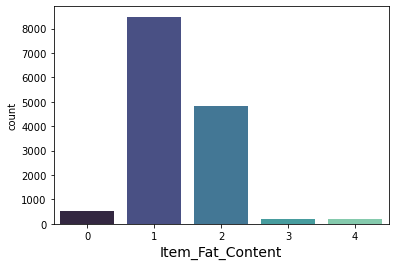

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=df ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

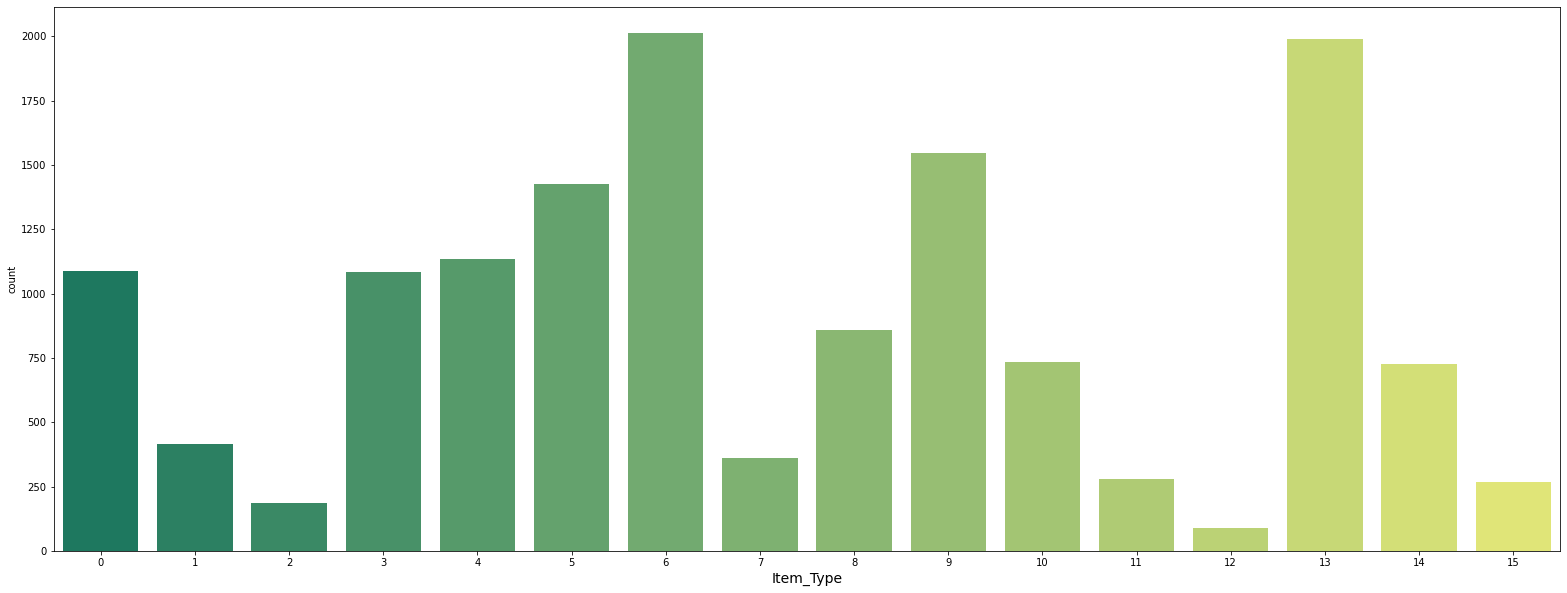

In [31]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=df ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

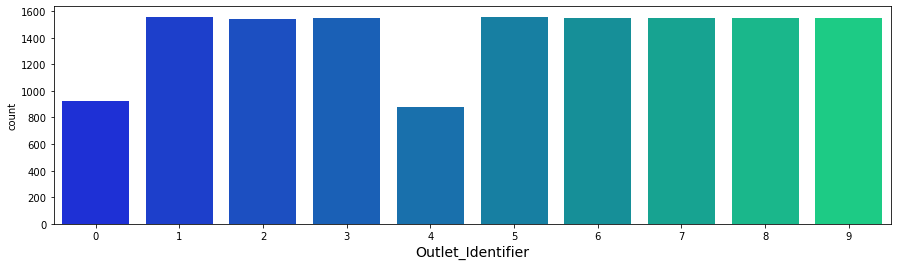

In [32]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=df ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

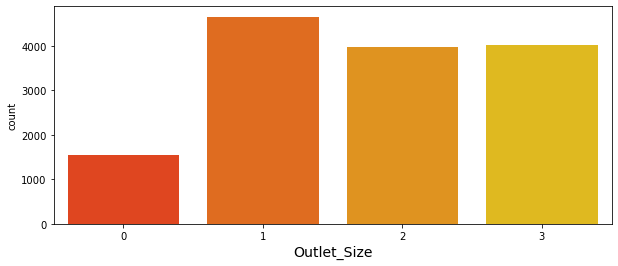

In [33]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=df ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

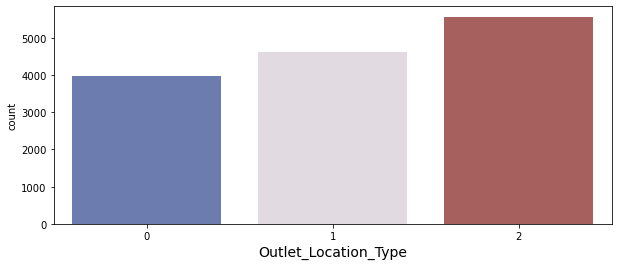

In [34]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=df ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

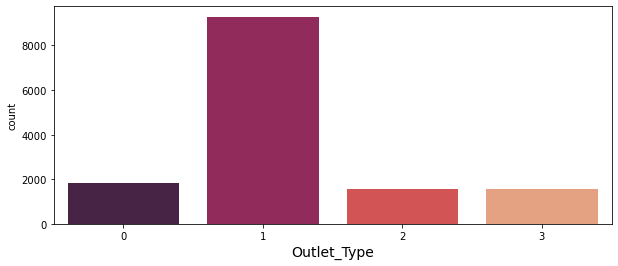

In [35]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=df ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

Categoric columns realizations

Item_Fat_Content - Most items sold are low fat.

Item_Type - Item types that are distictly popular are fruits and vegetables and snack foods.

Outlet_Identifier - Sold items are ditributed evenly among outlets excluding OUT010 and OUT019 that are significanly lower.

Outlet_Size - Bigmart outlets are mostly medium sized in our data.

Outlet_Location_Type - The most common type is Tier3.

Outlet_Type - By a wide margin the mode outlet type is Supermarket Type1.

### multivariate plots

I want to check the following relationships with Item_Outlet_Sales:

Sales per item type

Sales per outlet

Sales per outlet type

Sales per outlet size

Sales per location type

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


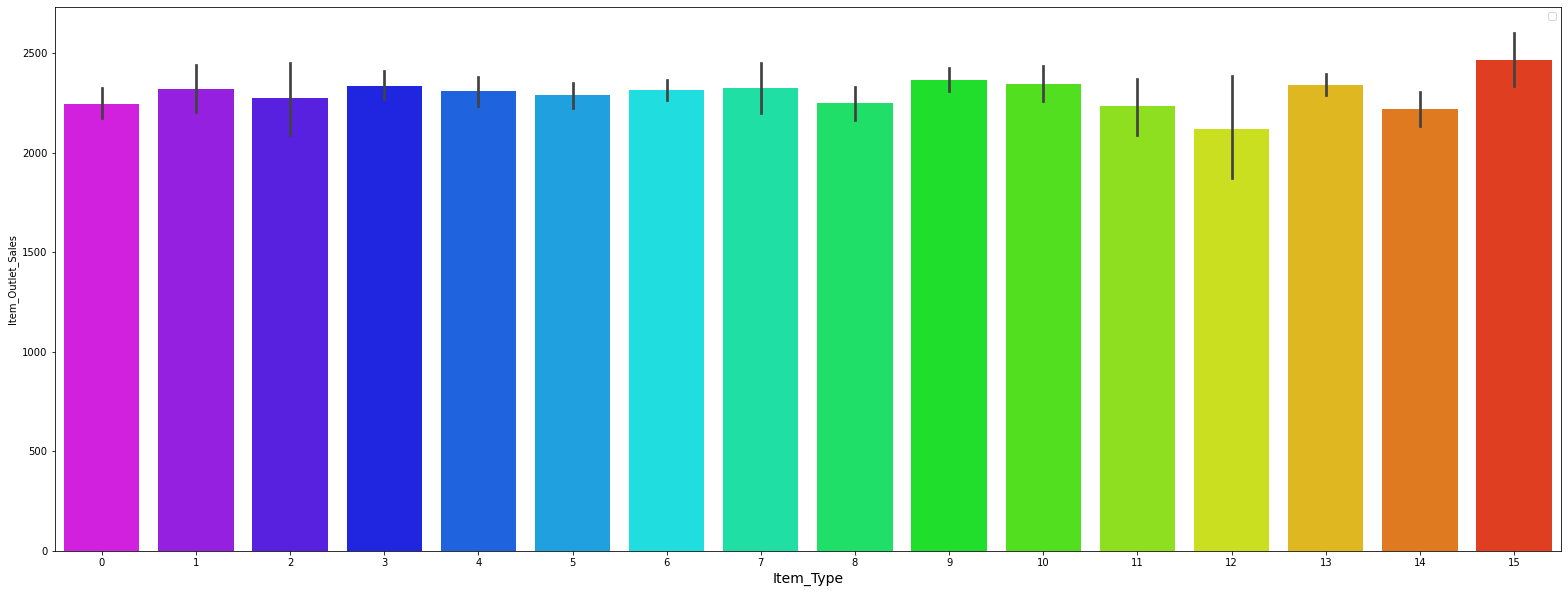

In [38]:
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=df ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


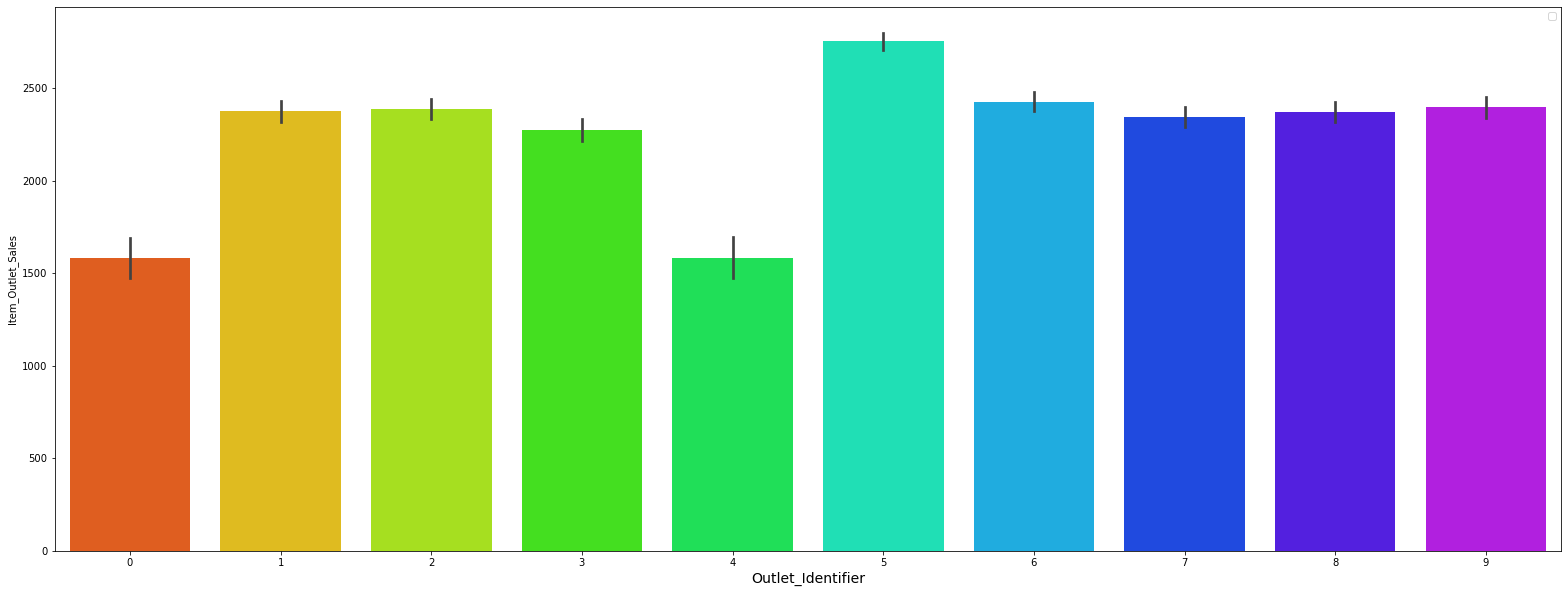

In [39]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=df ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


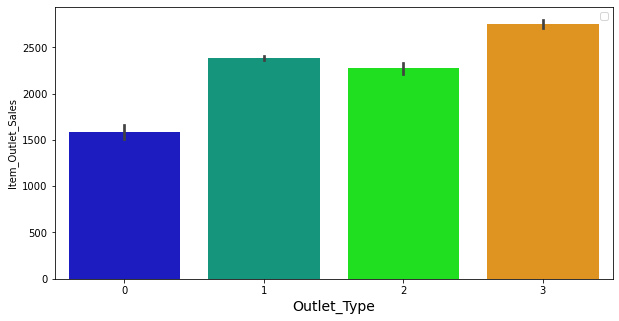

In [40]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=df ,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


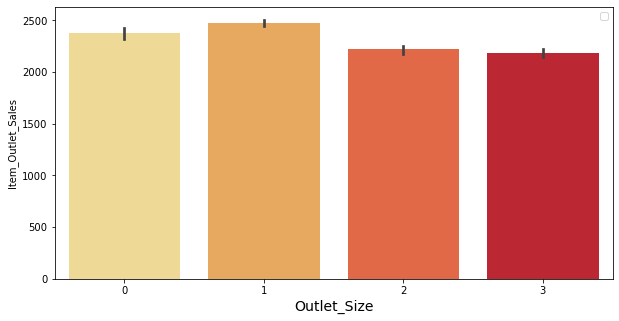

In [41]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=df ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


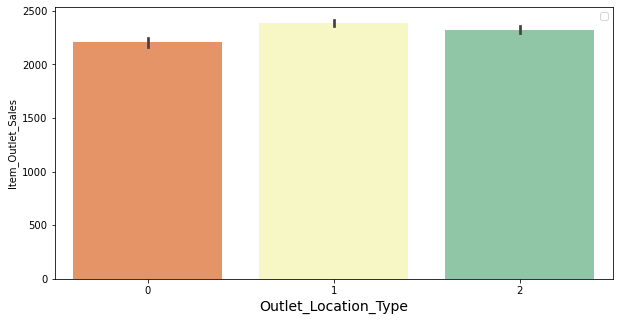

In [42]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=df ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()

Realizations:
    

The difference in item types by sales is very small.

Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.

Suprisingly supermarket type 3 is the most profitable and not type 1.

Medium and high outlet sizes are pretty much even in sales.

Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger).

### Shaping the Dataset

In [43]:
df  = df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [59]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,284,1,1097,7567,1,0,2540
1,57,2,1436,632,1,2,422
2,375,1,1172,3897,1,0,1639
3,392,2,0,5626,3,2,670
4,265,1,0,848,0,2,865
...,...,...,...,...,...,...,...
5676,298,2,718,3881,2,0,3493
5677,180,2,11820,5069,1,2,3493
5678,293,1,8009,3196,3,1,3493
5679,353,2,0,6626,3,1,3493


#### Train and Test the Model

In [46]:
y = df['Item_Outlet_Sales']
x = df.drop('Item_Outlet_Sales', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.8, random_state = 0)

### Cross Validation

In [47]:
def cross_val(model_name,model,x,y,cv):
    
    scores = CVS(model, x, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

### Modelling the Dataset

1. Linear Regresstion

In [50]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

#score variables
lr_MAE = round(MAE(y_test, y_pred),2)
lr_MSE = round(MSE(y_test, y_pred),2)
lr_R_2 = round(R2(y_test, y_pred),4)
lr_CS  = round(CVS(lr, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {lr_MAE}\n")
print(f" Mean Squared Error: {lr_MSE}\n")
print(f" R^2 Score: {lr_R_2}\n")
cross_val(lr,LinearRegression(),x,y,5)

 Mean Absolute Error: 1019.63

 Mean Squared Error: 1318491.19

 R^2 Score: 0.0759

LinearRegression() Scores:
-0.85
-0.85
-0.9
0.0
0.0
Average LinearRegression() score: -0.5208


2. Random Forest

In [53]:
#model
rf= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
rf.fit(x_train, y_train)
#predict
y_pred = rf.predict(x_test)

#score variables
rf_MAE = round(MAE(y_test, y_pred),2)
rf_MSE = round(MSE(y_test, y_pred),2)
rf_R_2 = round(R2(y_test, y_pred),4)
rf_CS  = round(CVS(rf, x, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {rf_MAE}\n")
print(f" Mean Squared Error: {rf_MSE}\n")
print(f" R^2 Score: {rf_R_2}\n")
cross_val(rf,RandomForestRegressor(),x,y,5)

 Mean Absolute Error: 1014.41

 Mean Squared Error: 1303705.02

 R^2 Score: 0.0863

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
-0.89
-0.82
-0.86
0.0
0.0
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: -0.5134


3. Lasso

In [56]:
#model
LS = Lasso(alpha = 0.05)
#fit
LS.fit(x_train,y_train)

#predict
y_predict = LS.predict(x_test)

#score variables
LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)
LS_CS  = round(CVS(LS, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")
cross_val(LS,Lasso(alpha = 0.05),x,y,5)

 Mean Absolute Error: 1019.63

 Mean Squared Error: 1318487.07

 R^2 Score: 0.0759

Lasso(alpha=0.05) Scores:
-0.85
-0.85
-0.9
0.0
0.0
Average Lasso(alpha=0.05) score: -0.5208


In [57]:
MAE= [lr_MAE,rf_MAE,LS_MAE]
MSE= [lr_MSE,rf_MSE,LS_MSE]
R_2= [lr_R_2,rf_R_2,LS_R_2]
Cross_score= [lr_CS,rf_CS,LS_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
1,Random Forest Regressor,1014.41,1303705.02,0.0863,-0.4238
0,Linear Regression,1019.63,1318491.19,0.0759,-0.5208
2,Lasso Regressor,1019.63,1318487.07,0.0759,-0.5208


Realizations

Item_MRP optimizes Maximum Outlet sales (positive correlation with the target).

Linear Regression and Lasso Regressor have the best perfomance in most categories.

only a third of the observed variation can be explained by the model's inputs of Random Forest Regressor, there for it's performance is not optimal even though his cross validation is the highest.
